
# Assignment 7: Visualizing Time Series Data



# Load and explore the data.

1. Import the required libraries.

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2. Import the dataset.

In [55]:
url = 'covid_report.xlsx'
df = pd.read_excel(url, header=0)

3. Peek into the dataset.

In [56]:
df.head()

,LOCATION_ID,GENDER,AGEGRP,DATE,COVID_COUNT,COUNTY_NAME
0,18001,F,0-19,2020-06-26,1,Adams
1,18001,F,0-19,2020-07-21,2,Adams
2,18001,F,0-19,2020-07-31,2,Adams
3,18001,F,0-19,2020-08-05,1,Adams
4,18001,F,0-19,2020-08-11,1,Adams


4. Convert the date column to datatime type in pandas.

In [57]:
df.index = pd.to_datetime(df['DATE'])
df = df.rename_axis('Date') # Rename the index

In [58]:
df

,LOCATION_ID,GENDER,AGEGRP,DATE,COVID_COUNT,COUNTY_NAME
Date,,,,,,
2020-06-26,18001,F,0-19,2020-06-26,1,Adams
2020-07-21,18001,F,0-19,2020-07-21,2,Adams
2020-07-31,18001,F,0-19,2020-07-31,2,Adams
2020-08-05,18001,F,0-19,2020-08-05,1,Adams
2020-08-11,18001,F,0-19,2020-08-11,1,Adams
...,...,...,...,...,...,...
2020-10-07,18183,M,80+,2020-10-07,1,Whitley
2020-09-14,18183,Unknown,30-39,2020-09-14,1,Whitley
2020-10-03,18183,Unknown,50-59,2020-10-03,1,Whitley


5. Generate the descriptive statistics.

In [59]:
df.describe(include = 'all')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,LOCATION_ID,GENDER,AGEGRP,DATE,COVID_COUNT,COUNTY_NAME
count,59376.000000,59376,59376,59376,59376.000000,59376
unique,NaN,3,9,214,NaN,92
top,NaN,F,20-29,2020-10-07 00:00:00,NaN,Marion
freq,NaN,30312,9442,598,NaN,3218
first,NaN,NaN,NaN,2020-03-06 00:00:00,NaN,NaN
last,NaN,NaN,NaN,2020-10-07 00:00:00,NaN,NaN
mean,18085.318546,NaN,NaN,NaN,2.183997,NaN
std,50.069947,NaN,NaN,NaN,2.744560,NaN
min,18001.000000,NaN,NaN,NaN,1.000000,NaN
25%,18043.000000,NaN,NaN,NaN,1.000000,NaN


## Plot daily cases

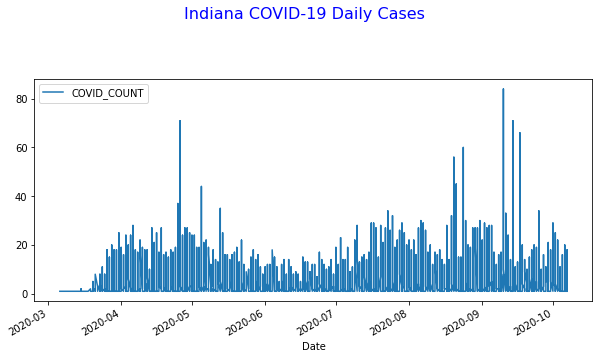

In [60]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
fig.suptitle('Indiana COVID-19 Daily Cases', color='blue', fontsize=16)
ax1 = fig.add_subplot(211)
df.plot(ax=ax1, y='COVID_COUNT'); # Note that index is used for x-axis values

1. Plot the total count on each day in our dataset.

In [61]:
dfg = df.groupby(by=['DATE']).sum()
dfg = dfg.rename(columns={'COVID_COUNT':'Daily Cases'})
dfg


,LOCATION_ID,Daily Cases
DATE,,
2020-03-06,18097,1
2020-03-08,54239,3
2020-03-09,18001,1
2020-03-10,90321,5
2020-03-11,18097,1
...,...,...
2020-10-03,8429776,1095
2020-10-04,7489528,828
2020-10-05,8228937,980


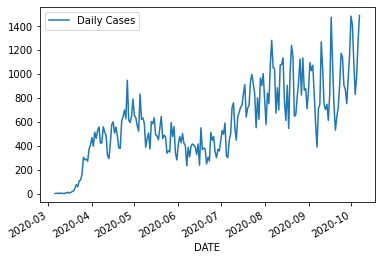

In [62]:
dfg.plot(y='Daily Cases')


## Task 1: Explore and discuss rolling averages.

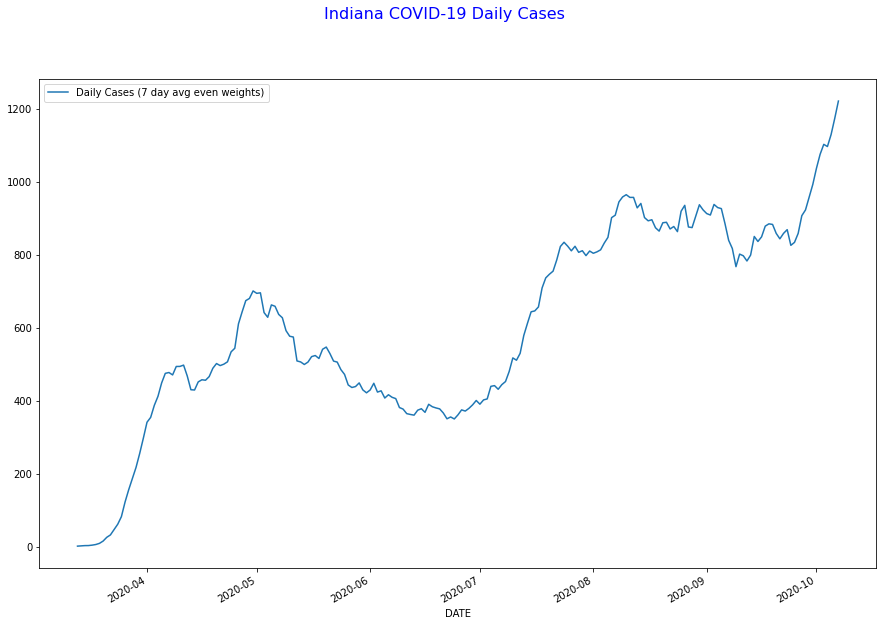

In [63]:
fig1,ax1 = plt.subplots()

fig1.set_figheight(10);
fig1.set_figwidth(15);
fig1.suptitle('Indiana COVID-19 Daily Cases', color='blue', fontsize=16);

dfg['Daily Cases'].rename('Daily Cases (7 day avg even weights)').rolling(7).mean().plot(ax=ax1,legend=True);

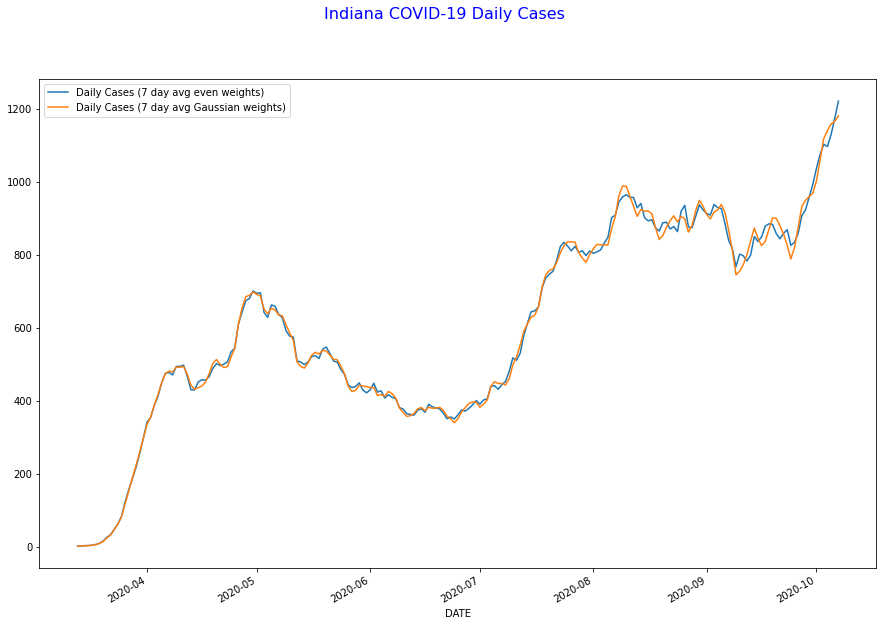

In [64]:
fig1,ax1 = plt.subplots()

fig1.set_figheight(10);
fig1.set_figwidth(15);

fig1.suptitle('Indiana COVID-19 Daily Cases', color='blue', fontsize=16);


dfg['Daily Cases'].rename('Daily Cases (7 day avg even weights)').rolling(7).mean().plot(ax=ax1,legend=True, y='Daily Cases');
dfg['Daily Cases'].rename('Daily Cases (7 day avg Gaussian weights)').rolling(7, win_type='gaussian').mean(std=3).plot(ax=ax1,legend=True);

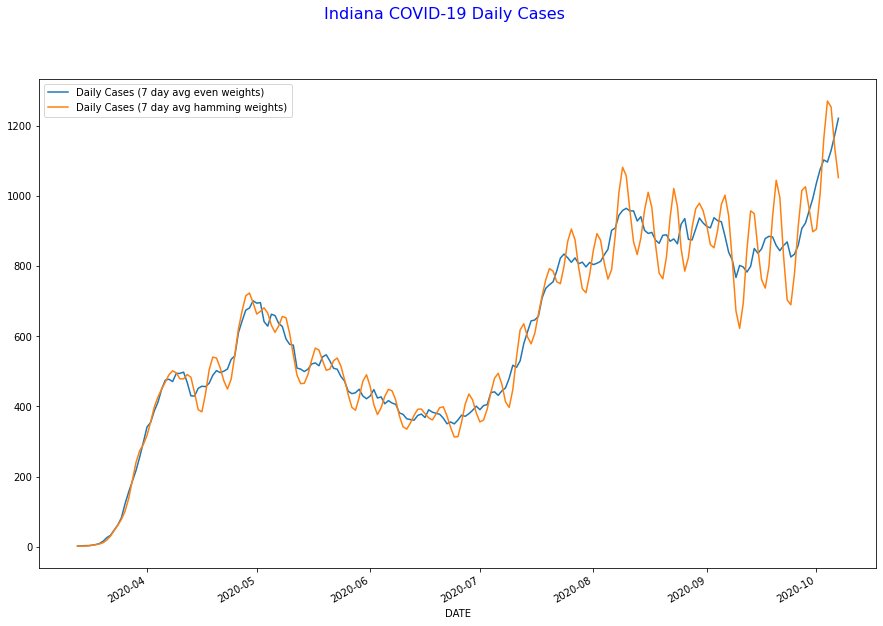

In [65]:
fig1,ax1 = plt.subplots()

fig1.set_figheight(10);
fig1.set_figwidth(15);

fig1.suptitle('Indiana COVID-19 Daily Cases', color='blue', fontsize=16);

dfg['Daily Cases'].rename('Daily Cases (7 day avg even weights)').rolling(7).mean().plot(ax=ax1,legend=True, y='Daily Cases')
dfg['Daily Cases'].rename('Daily Cases (7 day avg hamming weights)').rolling(7, win_type='hamming').mean().plot(ax=ax1,legend=True);

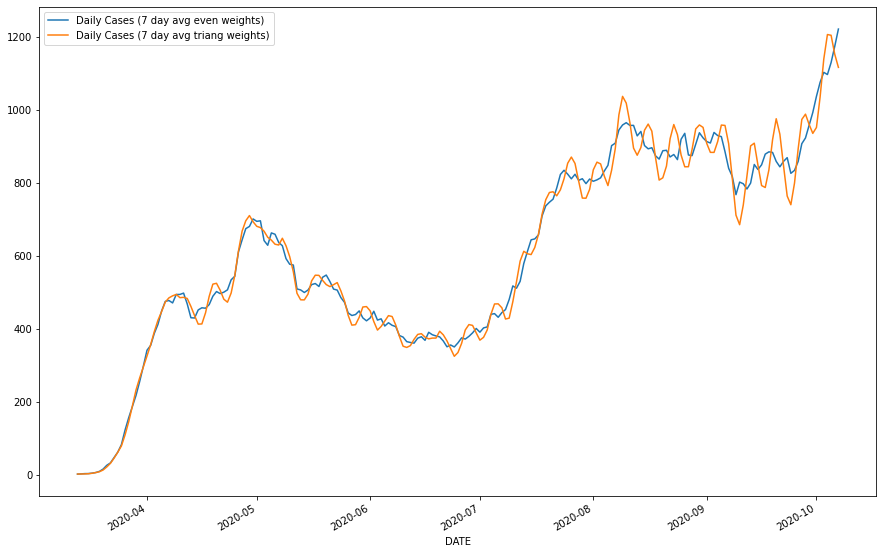

In [66]:
fig1,ax1 = plt.subplots()

fig1.set_figheight(10);
fig1.set_figwidth(15);

dfg['Daily Cases'].rename('Daily Cases (7 day avg even weights)').rolling(7).mean().plot(ax=ax1,legend=True, y='Daily Cases')

dfg['Daily Cases'].rename('Daily Cases (7 day avg triang weights)').rolling(7, win_type='triang').mean().plot(ax=ax1,legend=True);

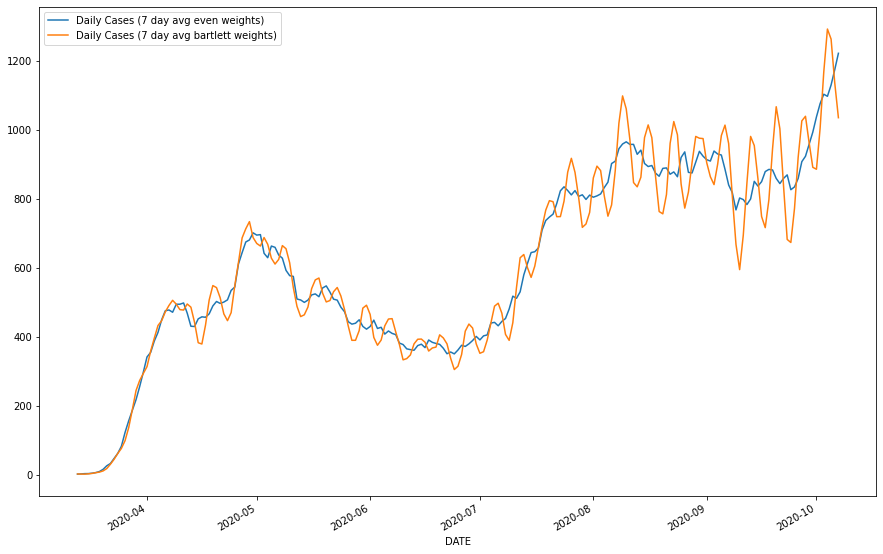

In [67]:
fig1,ax1 = plt.subplots()

fig1.set_figheight(10);
fig1.set_figwidth(15);

dfg['Daily Cases'].rename('Daily Cases (7 day avg even weights)').rolling(7).mean().plot(ax=ax1,legend=True, y='Daily Cases')

dfg['Daily Cases'].rename('Daily Cases (7 day avg bartlett weights)').rolling(7, win_type='bartlett').mean().plot(ax=ax1,legend=True);

### Interpretation:



1.   The total number of daily cases in the dataset for the given months in sparse. So, unless handle the missing values through interpolation, smoothness won't be evident.

2.   From the above plot, we can observe that the gaussian window function achieves the best smoothness. Unlike, the other window functions, the result obtained by the window function has less variation in data.

3. The gaussian window takes the standard deviation of the window function as input and calculates the mean of values in the given window, by assigning weights which follow the guassian distribution. Other weight functions like- triangle, bartlett, and hamming work in a similar fashion, and differ in the shape- i.e. the weights assigned to values in the given window. These function do not take any external parameters, unlike the gaussian function.

4. Observing the trend is important to decide upon a window function for smoothing. If we don't observe any significant trends in the data, we can use exponential smoothing technique. If there's a pattern, we can experiment with gaussian, hann or hamming windows.  



## Task2: Create a time series for one category of data.

1. Filter and aggregate the data for Monroe county.

In [68]:
df_monroe=df[df['COUNTY_NAME']=='Monroe']
df_monroe


,LOCATION_ID,GENDER,AGEGRP,DATE,COVID_COUNT,COUNTY_NAME
Date,,,,,,
2020-03-27,18105,F,0-19,2020-03-27,1,Monroe
2020-05-22,18105,F,0-19,2020-05-22,1,Monroe
2020-06-08,18105,F,0-19,2020-06-08,1,Monroe
2020-06-28,18105,F,0-19,2020-06-28,1,Monroe
2020-07-01,18105,F,0-19,2020-07-01,1,Monroe
...,...,...,...,...,...,...
2020-09-25,18105,Unknown,20-29,2020-09-25,1,Monroe
2020-05-18,18105,Unknown,30-39,2020-05-18,1,Monroe
2020-03-27,18105,Unknown,60-69,2020-03-27,1,Monroe


In [69]:
dfg_monroe = df_monroe.groupby(by=['DATE']).sum()
dfg_monroe = df_monroe.rename(columns={'COVID_COUNT':'Daily Cases'})
dfg_monroe

,LOCATION_ID,GENDER,AGEGRP,DATE,Daily Cases,COUNTY_NAME
Date,,,,,,
2020-03-27,18105,F,0-19,2020-03-27,1,Monroe
2020-05-22,18105,F,0-19,2020-05-22,1,Monroe
2020-06-08,18105,F,0-19,2020-06-08,1,Monroe
2020-06-28,18105,F,0-19,2020-06-28,1,Monroe
2020-07-01,18105,F,0-19,2020-07-01,1,Monroe
...,...,...,...,...,...,...
2020-09-25,18105,Unknown,20-29,2020-09-25,1,Monroe
2020-05-18,18105,Unknown,30-39,2020-05-18,1,Monroe
2020-03-27,18105,Unknown,60-69,2020-03-27,1,Monroe


2. Plot the daily cases for monroe county.

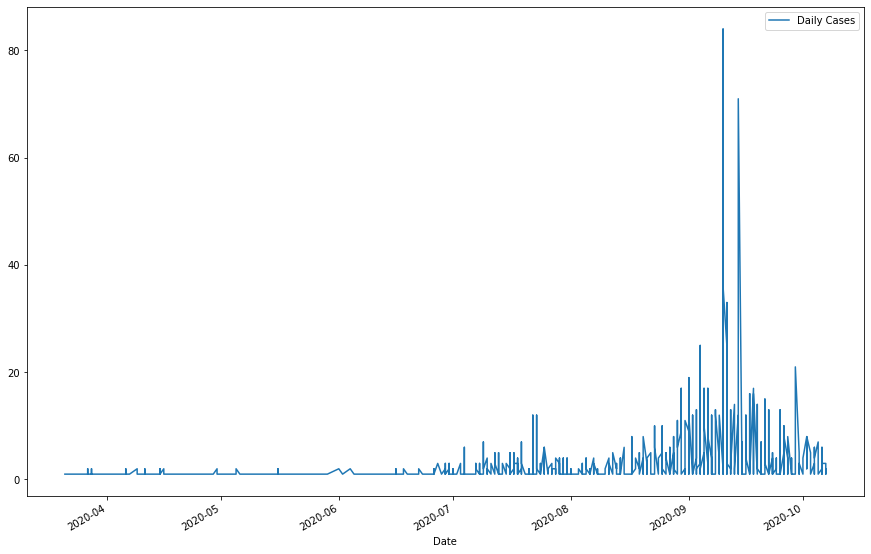

In [70]:
fig1,ax1 = plt.subplots()

fig1.set_figheight(10);
fig1.set_figwidth(15);

dfg_monroe.plot(ax=ax1,y='Daily Cases');


3. Use rolling average technique to smoothen the above curve.

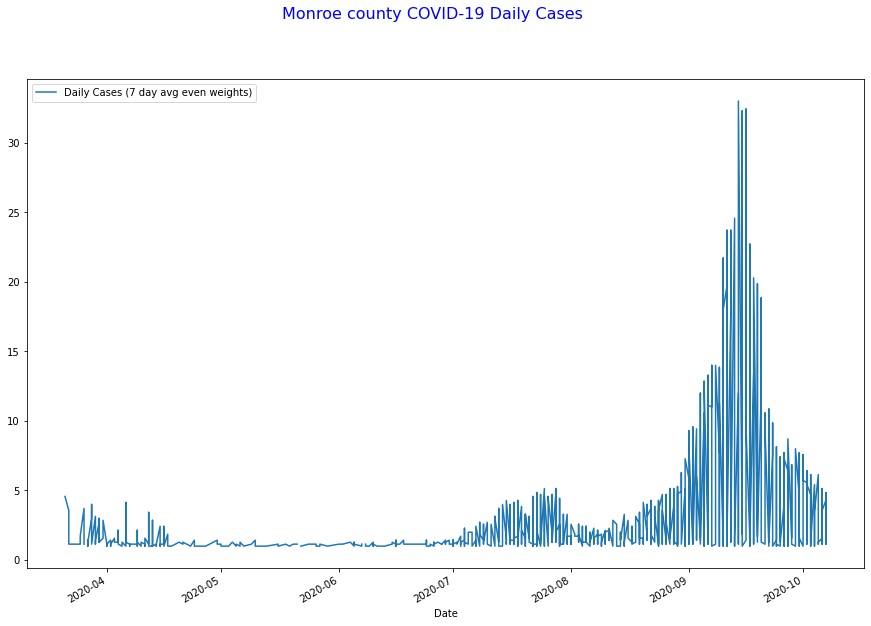

In [71]:
fig1,ax1 = plt.subplots()

fig1.set_figheight(10);
fig1.set_figwidth(15);

fig1.suptitle('Monroe county COVID-19 Daily Cases', color='blue', fontsize=16);


dfg_monroe['Daily Cases'].rename('Daily Cases (7 day avg even weights)').rolling(7).mean().plot(ax=ax1,legend=True);

4. Filter and aggreagate the data for women.

In [72]:
df_women=df[df['GENDER']=='F']
df_women

,LOCATION_ID,GENDER,AGEGRP,DATE,COVID_COUNT,COUNTY_NAME
Date,,,,,,
2020-06-26,18001,F,0-19,2020-06-26,1,Adams
2020-07-21,18001,F,0-19,2020-07-21,2,Adams
2020-07-31,18001,F,0-19,2020-07-31,2,Adams
2020-08-05,18001,F,0-19,2020-08-05,1,Adams
2020-08-11,18001,F,0-19,2020-08-11,1,Adams
...,...,...,...,...,...,...
2020-08-25,18183,F,80+,2020-08-25,1,Whitley
2020-09-04,18183,F,80+,2020-09-04,1,Whitley
2020-09-27,18183,F,80+,2020-09-27,2,Whitley


In [73]:
dfg_women = df_women.groupby(by=['DATE']).sum()
dfg_women = df_women.rename(columns={'COVID_COUNT':'Daily Cases'})
dfg_women

,LOCATION_ID,GENDER,AGEGRP,DATE,Daily Cases,COUNTY_NAME
Date,,,,,,
2020-06-26,18001,F,0-19,2020-06-26,1,Adams
2020-07-21,18001,F,0-19,2020-07-21,2,Adams
2020-07-31,18001,F,0-19,2020-07-31,2,Adams
2020-08-05,18001,F,0-19,2020-08-05,1,Adams
2020-08-11,18001,F,0-19,2020-08-11,1,Adams
...,...,...,...,...,...,...
2020-08-25,18183,F,80+,2020-08-25,1,Whitley
2020-09-04,18183,F,80+,2020-09-04,1,Whitley
2020-09-27,18183,F,80+,2020-09-27,2,Whitley


5. Plot the daily cases for women.

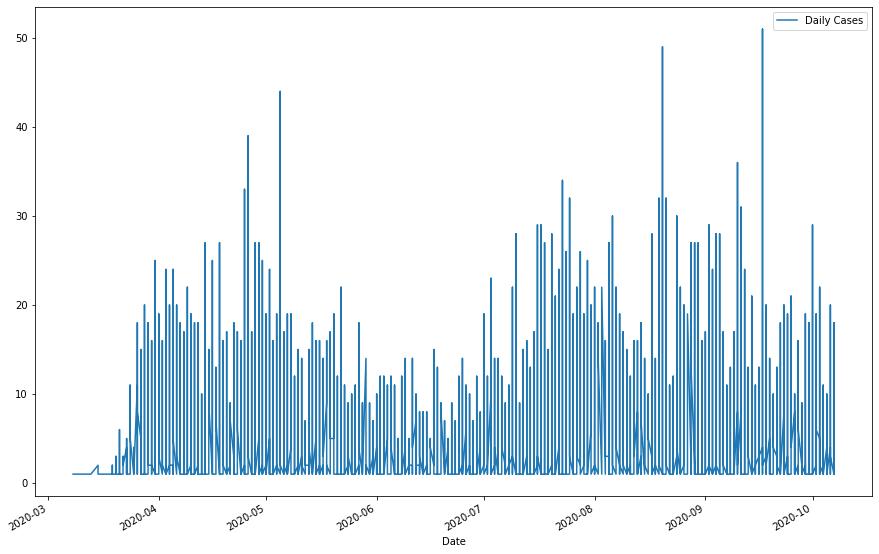

In [74]:
fig1,ax1 = plt.subplots()

fig1.set_figheight(10);
fig1.set_figwidth(15);

dfg_women.plot(ax=ax1,y='Daily Cases');


6. Smoothen the above curve with rolling average technique.

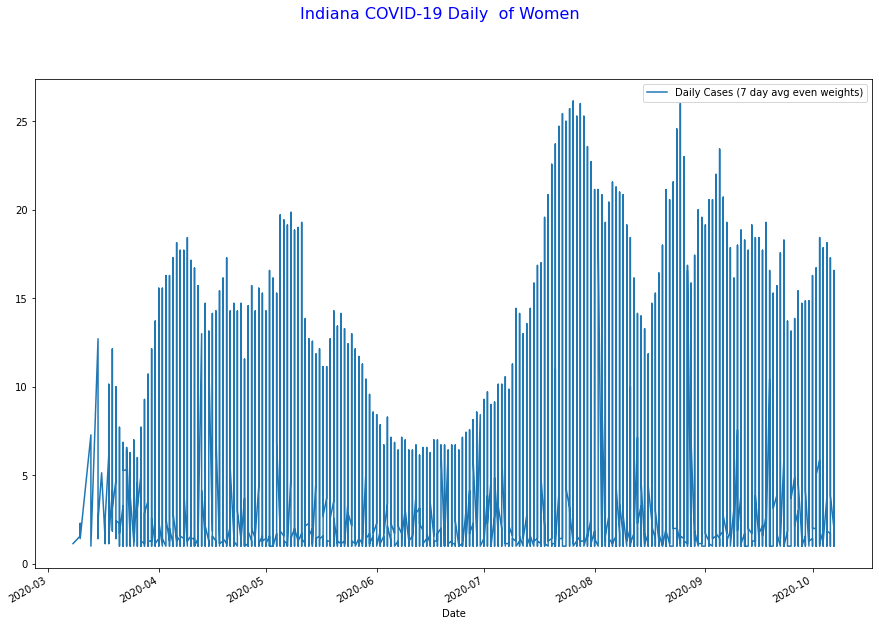

In [77]:
fig1,ax1 = plt.subplots()

fig1.set_figheight(10);
fig1.set_figwidth(15);

fig1.suptitle('Indiana COVID-19 Daily  of Women', color='blue', fontsize=16);


dfg_women['Daily Cases'].rename('Daily Cases (7 day avg even weights)').rolling(7).mean().plot(ax=ax1,legend=True);

## Task 3:


From the above plots we could see that the rolling averages technique does enhance the smoothness of the number of daily cases plot across each category. To me most of the plots look like multimodal gaussian distributions. So, I will try to enhance the daily cases in Monroe county plot with a gaussian window function. 

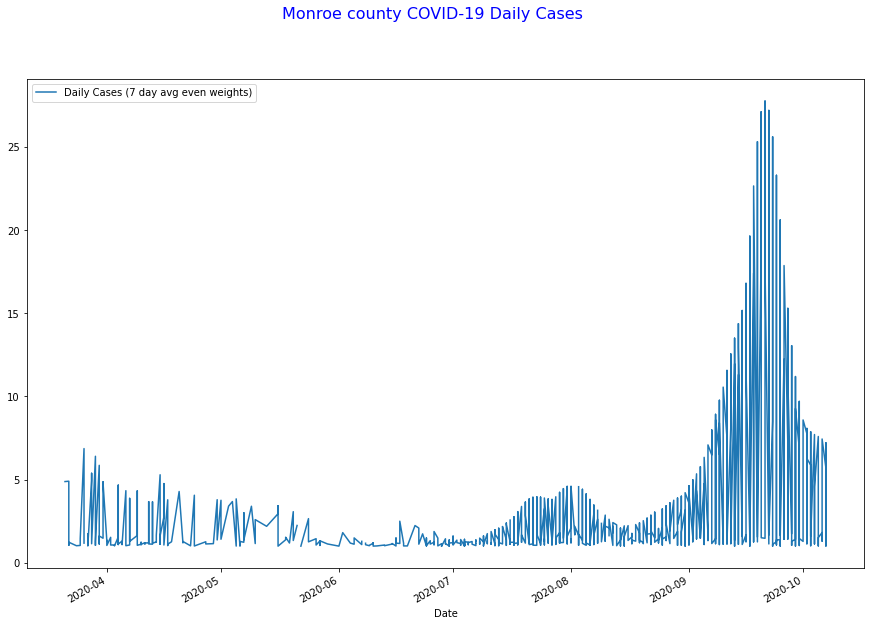

In [83]:
fig1,ax1 = plt.subplots()

fig1.set_figheight(10);
fig1.set_figwidth(15);

fig1.suptitle('Monroe county COVID-19 Daily Cases', color='blue', fontsize=16);


dfg_monroe['Daily Cases'].rename('Daily Cases (7 day avg even weights)').rolling(20,win_type='gaussian').mean(std=3).plot(ax=ax1,legend=True);

The plot is not ideal, but it's definitely better than the previous version where I used the rolling averages method. Since, the data for total number of across the given months is sparse, it's hard to avoid the variations. With proper interpolation techniques, we can enhance this plot further. But, from the above plot, it's evident the with a proper choice of window size and function we can smoothen a time series plot.